In [1]:
#Importing all necessary libraries
import numpy as np 
import pandas as pd 
import keras
from keras import metrics
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Importing all input and output dataset csv files

cedata = pd.read_csv('CE.csv')
cpdata = pd.read_csv('CP.csv')
eps1data = pd.read_csv('EPS1.csv')
fs1data = pd.read_csv('FS1.csv')
fs2data = pd.read_csv('FS2.csv')
ps1data = pd.read_csv('PS1.csv')
ps2data = pd.read_csv('PS2.csv')
ps3data = pd.read_csv('PS3.csv')
ps4data = pd.read_csv('PS4.csv')
ps5data = pd.read_csv('PS5.csv')
ps6data = pd.read_csv('PS6.csv') 
sedata = pd.read_csv('SE.csv')
ts1data = pd.read_csv('TS1.csv')
ts2data = pd.read_csv('TS2.csv')
ts3data = pd.read_csv('TS3.csv')
ts4data = pd.read_csv('TS4.csv') 
vs1data = pd.read_csv('VS1.csv')  

profile = pd.read_csv('Profile.csv') 

In [3]:
#Computing the mean per instance and arranging them in a 1D array in columns for every input dataset  
#Labelling each new column per the name of their respective sensors

def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1 

PS1 = pd.DataFrame(mean_conversion(ps1data))
PS1.columns = ['PS1'] 

PS2 = pd.DataFrame(mean_conversion(ps2data))
PS2.columns = ['PS2']

PS3 = pd.DataFrame(mean_conversion(ps3data))
PS3.columns = ['PS3']

PS4 = pd.DataFrame(mean_conversion(ps4data))
PS4.columns = ['PS4']

PS5 = pd.DataFrame(mean_conversion(ps5data))
PS5.columns = ['PS5']

PS6 = pd.DataFrame(mean_conversion(ps6data))
PS6.columns = ['PS6']

FS1 = pd.DataFrame(mean_conversion(fs1data))
FS1.columns = ['FS1']

FS2 = pd.DataFrame(mean_conversion(fs2data))
FS2.columns = ['FS2']

TS1 = pd.DataFrame(mean_conversion(ts1data))
TS1.columns = ['TS1']

TS2 = pd.DataFrame(mean_conversion(ts2data))
TS2.columns = ['TS2']

TS3 = pd.DataFrame(mean_conversion(ts3data))
TS3.columns = ['TS3']

TS4 = pd.DataFrame(mean_conversion(ts4data))
TS4.columns = ['TS4']

EPS1 = pd.DataFrame(mean_conversion(eps1data))
EPS1.columns = ['EPS1']

VS1 = pd.DataFrame(mean_conversion(vs1data))
VS1.columns = ['VS1']

CE = pd.DataFrame(mean_conversion(cedata))
CE.columns = ['CE']

CP = pd.DataFrame(mean_conversion(cpdata))
CP.columns = ['CP']

SE = pd.DataFrame(mean_conversion(sedata))
SE.columns = ['SE']

In [4]:
#Concatenating all the columns into a single input variable X
X = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, EPS1, VS1, CE, CP, SE], axis=1)

In [5]:
#Converting all NA values to Zero
X[np.isnan(X)] = 0 

In [6]:
#Sorting the multilabel-multiclass output file into 5 separate multiclass target labels 

Ycc = pd.DataFrame(profile.iloc[:, 0])          #Ycc = Cooler Condition  
Yvc = pd.DataFrame(profile.iloc[:, 1])          #Yvc = Valve Condition
Ypl = pd.DataFrame(profile.iloc[:, 2])           #Ypl = Pump Leak
Yha = pd.DataFrame(profile.iloc[:, 3])          #Yha = Hydraulic Accumulator
Ysf = pd.DataFrame(profile.iloc[:, 4])           #Ysf = Stable Flag

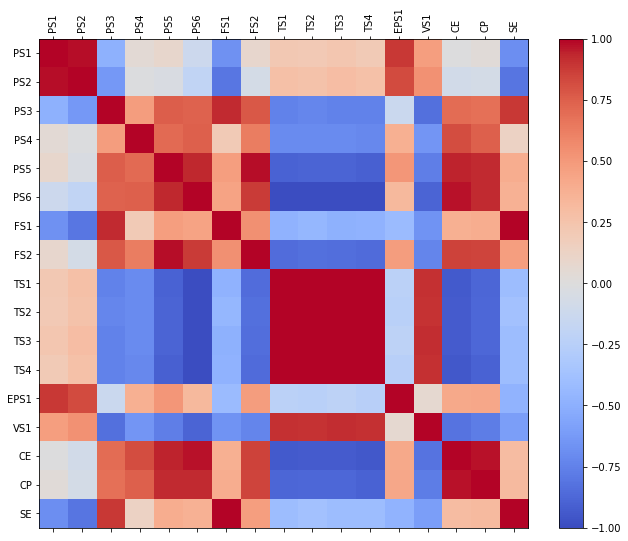

In [7]:
#Plotting the correlation between all input sensor data sets 

corr = X.corr(method='pearson')
fig, ax = plt.subplots(figsize=(11, 9))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show() 


In [83]:
# CLASSIFICTION MODEL (NEURAL NETWORK)

#Converting each target label classes into strings of 0 and 1

Y_cooling_cond = pd.get_dummies(Ycc.values.ravel()) 
Y_valve_cond = pd.get_dummies(Yvc.values.ravel()) 
Y_pump_leak = pd.get_dummies(Ypl.values.ravel()) 
Y_hydraulic_accu = pd.get_dummies(Yha.values.ravel()) 
Y_stable_flag = pd.get_dummies(Ysf.values.ravel()) 

#Creating a loop so that the neural network model evaluates the input data sets for the target labels separately in each iteration

def Feature(X, y, Label):

    #Splitting Training and Testing data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
    
    #Scaling the input data sets using Standard Scaler
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)

    #Creating Neural Network Model using Keras
    model = Sequential()
    
    #                                               Input & 1st layer
    model.add(Dense(24, kernel_initializer='normal', activation = 'softmax', input_dim = 17))
    
    #                                                     2nd layer
    model.add(Dense(units = 24, kernel_initializer='normal', activation = 'softmax'))
        
    #                                                     3rd layer
    model.add(Dense(units = 24, kernel_initializer='normal', activation = 'softmax'))

    #                                                  Output layer
    model.add(Dense(units = y.columns.size, kernel_initializer='normal',  activation = 'softmax'))
    
    #Compiling and fitting model
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy']) 
    
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 1000, batch_size=20, verbose=0)     
    
    y_pred = model.predict(X_test)
    
    #Evaluating the performance of the model
    scores = model.evaluate(X_test, y_test) 
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  


Feature(X, Y_cooling_cond, 'Cooler Condition')
Feature(X, Y_valve_cond, 'Valve Condition')
Feature(X, Y_pump_leak, 'Internal Pump Leakage')
Feature(X, Y_hydraulic_accu, 'Hydraulic Accumulator')
Feature(X, Y_stable_flag, 'Stable Flag')

441/441 [==============================] - 0s 529us/step

categorical_accuracy: 100.00%
441/441 [==============================] - 0s 415us/step

categorical_accuracy: 84.13%
441/441 [==============================] - 0s 665us/step

categorical_accuracy: 98.19%
441/441 [==============================] - 0s 556us/step

categorical_accuracy: 89.12%
441/441 [==============================] - 1s 1ms/step

categorical_accuracy: 91.84%


In [ ]:
# REGRESSION MODEL (NEURAL NETWORK)

#Converting integer label values into float type
Ycc = pd.DataFrame(Ycc).astype(float)
Yvc = pd.DataFrame(Yvc).astype(float)
Ypl = pd.DataFrame(Ypl).astype(float)
Yhs = pd.DataFrame(Yha).astype(float)
Ysf = pd.DataFrame(Ysf).astype(float)  

#Creating a loop so that the neural network model evaluates the input data sets for the target labels separately in each iteration

def Feature(X, y, Label):

    from sklearn.preprocessing import MinMaxScaler
    #Splitting Training and Testing data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
    
    #Scaling the input data sets using MinMax Scaler
    scaler = MinMaxScaler(feature_range=(0,1))  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)

    #Creating Neural Network Model using Keras
    model = Sequential()
    
    #                                               Input & 1st layer
    model.add(Dense(24, kernel_initializer='normal', activation = 'relu', input_dim = 17))
    
    #                                                     2nd layer
    model.add(Dense(units = 24, kernel_initializer='normal', activation = 'relu'))
    
    #                                                     3rd layer
    model.add(Dense(units = 24, kernel_initializer='normal', activation = 'relu'))

    #                                                  Output layer
    model.add(Dense(units = 1, kernel_initializer='normal'))
    
    #Compiling and fitting model
    model.compile(loss= 'mean_squared_error', optimizer='adam', metrics=['mse']) 
    
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 500, batch_size=20, verbose=1)     
    
    y_pred = model.predict(X_test)
    
    #Evaluating the performance of the model    
    score_mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error, MSE =', score_mse)
    
    score_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error, RMSE =', score_rmse)
    
    score_mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error, MAE =', score_mae) 
    
    R2_score = r2_score(y_test, y_pred) 
    print('R2 Score =', R2_score)

    fig, ax = plt.subplots(figsize=(11, 9))
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()])
    plt.title(Label)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    plt.show() 


Feature(X, Ycc, 'Cooler Condition')
Feature(X, Yvc, 'Valve Condition')
Feature(X, Ypl, 'Pump Leak')
Feature(X, Yha, 'Hydraulic Accumulator')
Feature(X, Ysf, 'Stable Flag')